# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
WeRateDogs = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
from PIL import Image
from io import BytesIO
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
import json
with open('tweet_json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))
df = pd.DataFrame.from_records(status)
TwitterAPI=df[["id","retweet_count","favorite_count"]]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [4]:
WeRateDogs.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1401,699434518667751424,NaN,NaN,2016-02-16 03:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know this is a tad late but here's a wonderf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699434518...,12,10,None,None,None,pupper,None
1368,702539513671897089,NaN,NaN,2016-02-24 17:04:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Wild Tuscan Poofwiggle. Careful not ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702539513...,12,10,a,None,None,None,None
1486,693109034023534592,NaN,NaN,2016-01-29 16:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Thank you friend that was a swell petting"" 11...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/693109034...,11,10,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [5]:
WeRateDogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
WeRateDogs.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [7]:
WeRateDogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
WeRateDogs.duplicated().unique()

array([False])

In [9]:
WeRateDogs['tweet_id'].isnull().count()

2356

In [10]:
WeRateDogs['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [11]:
TwitterAPI

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [12]:
TwitterAPI.duplicated().unique()

array([False])

In [13]:
image_predictions = pd.read_csv("image-predictions.tsv",sep='\t')
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1747,823322678127919110,https://pbs.twimg.com/media/C20HmaKWgAQ6-6X.jpg,2,cowboy_boot,0.990253,False,Chihuahua,0.001836,True,papillon,0.001274,True
496,675781562965868544,https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg,1,Maltese_dog,0.921968,True,West_Highland_white_terrier,0.017811,True,toy_poodle,0.013555,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
854,696488710901260288,https://pbs.twimg.com/media/CapsyfkWcAQ41uC.jpg,1,briard,0.369063,True,Scotch_terrier,0.168204,True,giant_schnauzer,0.120553,True
1236,746726898085036033,https://pbs.twimg.com/media/ClzoJz7WYAELHSf.jpg,1,golden_retriever,0.256505,True,Labrador_retriever,0.252417,True,seat_belt,0.203163,False
1946,862457590147678208,https://pbs.twimg.com/media/C_gQmaTUMAAPYSS.jpg,1,home_theater,0.496348,False,studio_couch,0.167256,False,barber_chair,0.052625,False
1841,838083903487373313,https://pbs.twimg.com/media/C6F42cGUYAAIKsX.jpg,2,chow,0.800975,True,seat_belt,0.164133,False,Pomeranian,0.017981,True
1669,813066809284972545,https://pbs.twimg.com/media/C0iX8OOVEAEIpMC.jpg,1,toy_terrier,0.776400,True,Pembroke,0.115034,True,basenji,0.048873,True
818,692901601640583168,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,1,soft-coated_wheaten_terrier,0.403496,True,cocker_spaniel,0.135164,True,golden_retriever,0.088719,True
166,668981893510119424,https://pbs.twimg.com/media/CUize-0WEAAerAK.jpg,1,jellyfish,0.447246,False,coral_reef,0.238625,False,goldfish,0.040227,False


In [14]:
image_predictions.duplicated().unique()

array([False])

### Quality issues
1. The column names for all tables start with a lowercase letter and contain _ and same for p1 and p2 and p3 values on 'image_predictions' Table and we should replace the caracter '_' by espace.
2. 'WeRateDogs' Table : we only want original twitter ratings (no retweets and replys).

3. 'WeRateDogs' Table : convert 'timestamp' and 'retweeted_status_timestamp' type to date.

4. 'WeRateDogs' Table : Messing retweeted_status_user_id and retweeted_status_timestamp and in_reply_to_status_id and in_reply_to_user_id and retweeted_status_id.

5. The source column on 'WeRateDogs' Table should extract from him the information that we need only.

6. 'WeRateDogs' and 'TwitterAPI' Tables : the columns that contain twitter id should have the same name.

7. 'WeRateDogs' Table : The rating_numerator is greater than rating_denominator. 	

8. 'image_predictions' Table : The probability of breed is not exact .

### Tidiness issues
1. 'WeRateDogs' Table : the dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo. 

2. Informations about tweets is spread across three different dataframes so we must unit them in one dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [15]:
# Make copies of original pieces of data
WeRateDogs_copy=WeRateDogs.copy()
TwitterAPI_copy=TwitterAPI.copy()
image_predictions_copy=image_predictions.copy()

In [16]:
image_predictions_copy[image_predictions_copy.eq("printer").any(1)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False
1869,844580511645339650,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg,1,washer,0.903064,False,dishwasher,0.032489,False,printer,0.016456,False
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False


### Issue #1:

The column names for all tables start with a lowercase letter and contain _ and same for p1 and p2 and p3 values on 'image_predictions' Table and we should replace the caracter '_' by espace.

### code

In [17]:
WeRateDogs_copy.columns=WeRateDogs_copy.columns.str.capitalize()
TwitterAPI_copy.columns=TwitterAPI_copy.columns.str.capitalize()
image_predictions_copy.columns=image_predictions_copy.columns.str.capitalize()
WeRateDogs_copy.columns = WeRateDogs_copy.columns.str.replace("_", " ")
TwitterAPI_copy.columns = TwitterAPI_copy.columns.str.replace("_", " ")
image_predictions_copy.columns = image_predictions_copy.columns.str.replace("_", " ")

### Test

In [18]:
WeRateDogs_copy.head()

,Tweet id,In reply to status id,In reply to user id,Timestamp,Source,Text,Retweeted status id,Retweeted status user id,Retweeted status timestamp,Expanded urls,Rating numerator,Rating denominator,Name,Doggo,Floofer,Pupper,Puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
TwitterAPI_copy.head()

,Id,Retweet count,Favorite count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [20]:
image_predictions_copy.head()

,Tweet id,Jpg url,Img num,P1,P1 conf,P1 dog,P2,P2 conf,P2 dog,P3,P3 conf,P3 dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #2:

'WeRateDogs' Table : we only want original twitter ratings (no retweets and replys).

#### Code

In [21]:
WeRateDogs_copy = WeRateDogs_copy[WeRateDogs_copy['Retweeted status id'].isna()] 
WeRateDogs_copy = WeRateDogs_copy[WeRateDogs_copy['In reply to status id'].isna()] 

#### Test

In [22]:
WeRateDogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tweet id                    2097 non-null   int64  
 1   In reply to status id       0 non-null      float64
 2   In reply to user id         0 non-null      float64
 3   Timestamp                   2097 non-null   object 
 4   Source                      2097 non-null   object 
 5   Text                        2097 non-null   object 
 6   Retweeted status id         0 non-null      float64
 7   Retweeted status user id    0 non-null      float64
 8   Retweeted status timestamp  0 non-null      object 
 9   Expanded urls               2094 non-null   object 
 10  Rating numerator            2097 non-null   int64  
 11  Rating denominator          2097 non-null   int64  
 12  Name                        2097 non-null   object 
 13  Doggo                       2097 

### Issue #3:

#### 'WeRateDogs' Table : convert 'timestamp' and 'retweeted_status_timestamp' type to date.

#### code

In [23]:
WeRateDogs_copy['Timestamp']=pd.to_datetime(WeRateDogs_copy['Timestamp'])
WeRateDogs_copy['Retweeted status timestamp']=pd.to_datetime(WeRateDogs_copy['Retweeted status timestamp'])

#### Test

In [24]:
WeRateDogs_copy.dtypes

Tweet id                                    int64
In reply to status id                     float64
In reply to user id                       float64
Timestamp                     datetime64[ns, UTC]
Source                                     object
Text                                       object
Retweeted status id                       float64
Retweeted status user id                  float64
Retweeted status timestamp         datetime64[ns]
Expanded urls                              object
Rating numerator                            int64
Rating denominator                          int64
Name                                       object
Doggo                                      object
Floofer                                    object
Pupper                                     object
Puppo                                      object
dtype: object

### Issue #4: 'WeRateDogs' Table : Messing retweeted_status_user_id, retweeted_status_timestamp , in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id

#### Code

In [25]:
#we remove these columns because we don't need them for our analysis
WeRateDogs_copy.drop(['Retweeted status user id', 'Retweeted status timestamp','In reply to status id','In reply to user id','Retweeted status id'], axis=1,inplace=True)


#### Test

In [26]:
WeRateDogs_copy.head()

,Tweet id,Timestamp,Source,Text,Expanded urls,Rating numerator,Rating denominator,Name,Doggo,Floofer,Pupper,Puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #5: The source column on 'WeRateDogs' Table should extract from him the information that we need only.

#### Code

In [27]:
import numpy as np
conditions2 = [
    (WeRateDogs_copy['Source'] == '<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>'),
    (WeRateDogs_copy['Source'] == '<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>'),
    (WeRateDogs_copy['Source'] == '<a href=\"http://vine.co\" rel=\"nofollow\">Vine - Make a Scene</a>'),
    (WeRateDogs_copy['Source'] == '<a href=\"https://about.twitter.com/products/tweetdeck\" rel=\"nofollow\">TweetDeck</a>')]
values2 = ['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
WeRateDogs_copy['Source'] = np.select(conditions2, values2)


#### Test

In [28]:
WeRateDogs_copy['Source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #6 : 'WeRateDogs' and 'TwitterAPI' Tables : the columns that contain twitter id should have the same name.

#### Code

In [29]:
TwitterAPI_copy.rename(columns={"Id": "Tweet id"}, errors="raise",inplace=True)

#### Test

In [30]:
TwitterAPI_copy.dtypes

Tweet id          int64
Retweet count     int64
Favorite count    int64
dtype: object

### Issue #7 : 

'WeRateDogs' Table : The rating_numerator is greater than rating_denominator.

#### Code

In [31]:
WeRateDogs_copy["Rating numerator"] = np.where(WeRateDogs_copy["Rating numerator"] >10, 10, WeRateDogs_copy["Rating numerator"])

#### Test

In [32]:
WeRateDogs_copy.head()

,Tweet id,Timestamp,Source,Text,Expanded urls,Rating numerator,Rating denominator,Name,Doggo,Floofer,Pupper,Puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,None,None,None,None


### Issue #8 : 

'image_predictions' Table : The probability of breed is not exact .

#### Code

In [33]:
image_predictions_copy['Breed'] = 0
def breed(image_predictions_copy):    
    if (image_predictions_copy['P1 dog']==True):
        return image_predictions_copy['P1']
    elif (image_predictions_copy['P2 dog']==True):
        return image_predictions_copy['P2']
    elif (image_predictions_copy['P3 dog']==True):
        return image_predictions_copy['P3']
    else :
        return "None"

image_predictions_copy['Breed'] = image_predictions_copy.apply(breed, axis = 1)
image_predictions_copy['Breed'] = image_predictions_copy['Breed'].str.replace("_", " ")

#### Test

In [34]:
image_predictions_copy.sample(10)

,Tweet id,Jpg url,Img num,P1,P1 conf,P1 dog,P2,P2 conf,P2 dog,P3,P3 conf,P3 dog,Breed
1432,773308824254029826,https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg,1,shopping_cart,0.572349,False,Labrador_retriever,0.151406,True,shopping_basket,0.107102,False,Labrador retriever
1780,828650029636317184,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,golden_retriever,0.649209,True,Chesapeake_Bay_retriever,0.198560,True,vizsla,0.056200,True,golden retriever
1936,860184849394610176,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,1,chimpanzee,0.267612,False,gorilla,0.104293,False,orangutan,0.059908,False,None
215,670055038660800512,https://pbs.twimg.com/media/CUyDgChWUAAmNSI.jpg,1,snail,0.563631,False,slug,0.296649,False,bolete,0.031839,False,None
870,697881462549430272,https://pbs.twimg.com/media/Ca9feqDUAAA_z7T.jpg,1,washbasin,0.176423,False,paper_towel,0.167462,False,toilet_tissue,0.098029,False,None
791,690690673629138944,https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg,1,bath_towel,0.194532,False,radiator,0.127776,False,Maltese_dog,0.089625,True,Maltese dog
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-...,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False,dalmatian
1502,784517518371221505,https://pbs.twimg.com/media/CuMqhGrXYAQwRqU.jpg,2,malamute,0.757764,True,Eskimo_dog,0.151248,True,Siberian_husky,0.084840,True,malamute
23,666345417576210432,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1,golden_retriever,0.858744,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,0.014241,True,golden retriever
437,674416750885273600,https://pbs.twimg.com/media/CVwCdCFW4AUHY4D.jpg,1,Chihuahua,0.287201,True,Boston_bull,0.250920,True,whippet,0.141012,True,Chihuahua


### Tidiness Issue #1:

####  'WeRateDogs' Table : the dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo. 

#### Code

In [35]:
import numpy as np
conditions = [
    (WeRateDogs_copy['Doggo'] == "doggo"),
    (WeRateDogs_copy['Floofer'] == "floofer"),
    (WeRateDogs_copy['Pupper'] == "pupper"),
    (WeRateDogs_copy['Puppo'] == "puppo"),
    (WeRateDogs_copy['Doggo'] == "None") & (WeRateDogs_copy['Floofer'] == "None") & (WeRateDogs_copy['Pupper'] == "None") & (WeRateDogs_copy['Puppo'] == "None")
    ]
values = ['Doggo', 'Floofer', 'Pupper', 'Puppo', 'None']
WeRateDogs_copy['Dog Stage'] = np.select(conditions, values)
WeRateDogs_copy.drop(['Doggo', 'Floofer','Pupper','Puppo'], axis=1,inplace=True)


#### Test

In [36]:
WeRateDogs_copy.sample(5)

,Tweet id,Timestamp,Source,Text,Expanded urls,Rating numerator,Rating denominator,Name,Dog Stage
1542,689599056876867584,2016-01-20 00:03:21+00:00,Twitter for iPhone,Here we see 33 dogs posing for a picture. All ...,https://twitter.com/dog_rates/status/689599056...,10,10,None,None
863,762471784394268675,2016-08-08 02:13:34+00:00,Twitter for iPhone,Meet Glenn. Being in public scares him. Fright...,https://twitter.com/dog_rates/status/762471784...,10,10,Glenn,None
23,887473957103951883,2017-07-19 00:47:34+00:00,Twitter for iPhone,This is Canela. She attempted some fancy porch...,https://twitter.com/dog_rates/status/887473957...,10,10,Canela,None
16,888917238123831296,2017-07-23 00:22:39+00:00,Twitter for iPhone,This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,10,10,Jim,None
646,793150605191548928,2016-10-31 18:00:14+00:00,Twitter for iPhone,This is Nida. She's a free elf. Waited so long...,https://twitter.com/dog_rates/status/793150605...,10,10,Nida,None


### Tidiness Issue #2:

####  Informations about tweets is spread across three different dataframes so we must unit them in one dataframe.

#### code

In [37]:
twitter_archive_master= WeRateDogs_copy.merge(TwitterAPI_copy, how='right', on='Tweet id')
twitter_archive_master= pd.merge(twitter_archive_master,image_predictions_copy[['Tweet id','Breed']], on='Tweet id',how='right')

#### Test

In [38]:
twitter_archive_master.head()

,Tweet id,Timestamp,Source,Text,Expanded urls,Rating numerator,Rating denominator,Name,Dog Stage,Retweet count,Favorite count,Breed
0,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,None,None,532.0,2535.0,Welsh springer spaniel
1,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,None,48.0,132.0,redbone
2,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,None,47.0,128.0,German shepherd
3,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,None,147.0,311.0,Rhodesian ridgeback
4,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,None,41.0,111.0,miniature pinscher


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [39]:
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [40]:
twitter_archive_master.head()

,Tweet id,Timestamp,Source,Text,Expanded urls,Rating numerator,Rating denominator,Name,Dog Stage,Retweet count,Favorite count,Breed
0,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,None,None,532.0,2535.0,Welsh springer spaniel
1,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,None,48.0,132.0,redbone
2,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,None,47.0,128.0,German shepherd
3,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,None,147.0,311.0,Rhodesian ridgeback
4,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,None,41.0,111.0,miniature pinscher


### Insights:
1. The top retweet count is for standard poodle cat.

2. The top favorite count is for saluki.

3. The top favorite count is for Puppo dog satge.

### Visualization

In [41]:
twitter_archive_master_graph = twitter_archive_master.groupby(['Breed']).mean()
twitter_archive_master_graph=twitter_archive_master_graph.reset_index()  
twitter_archive_master_graph.sample(5)

,Breed,Tweet id,Rating numerator,Rating denominator,Retweet count,Favorite count
2,American Staffordshire terrier,7.597284e+17,9.250000,10.0,2310.812500,9380.187500
52,Rhodesian ridgeback,7.218394e+17,9.000000,10.0,769.000000,4041.000000
54,Saint Bernard,7.241174e+17,9.428571,10.0,1774.375000,4006.750000
20,English springer,7.228781e+17,9.500000,10.0,5106.272727,12853.000000
104,schipperke,7.389692e+17,9.769231,10.0,3227.333333,7354.866667


<AxesSubplot:title={'center':'Retweet count by Breed'}, xlabel='Breed'>

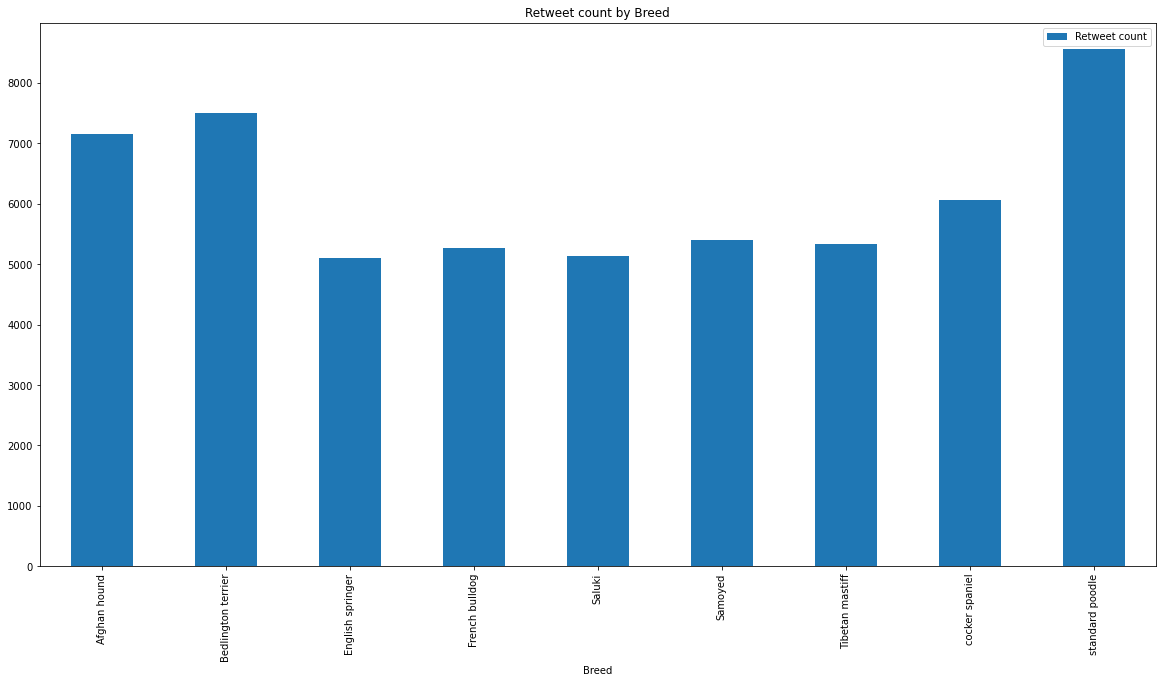

In [42]:
twitter_archive_master_topretweet = twitter_archive_master_graph[twitter_archive_master_graph["Retweet count"] >=5000]
twitter_archive_master_topretweet.plot.bar(x='Breed',y='Retweet count',title="Retweet count by Breed",figsize=(20,10))

<AxesSubplot:title={'center':'Favorite count by Breed'}, xlabel='Breed'>

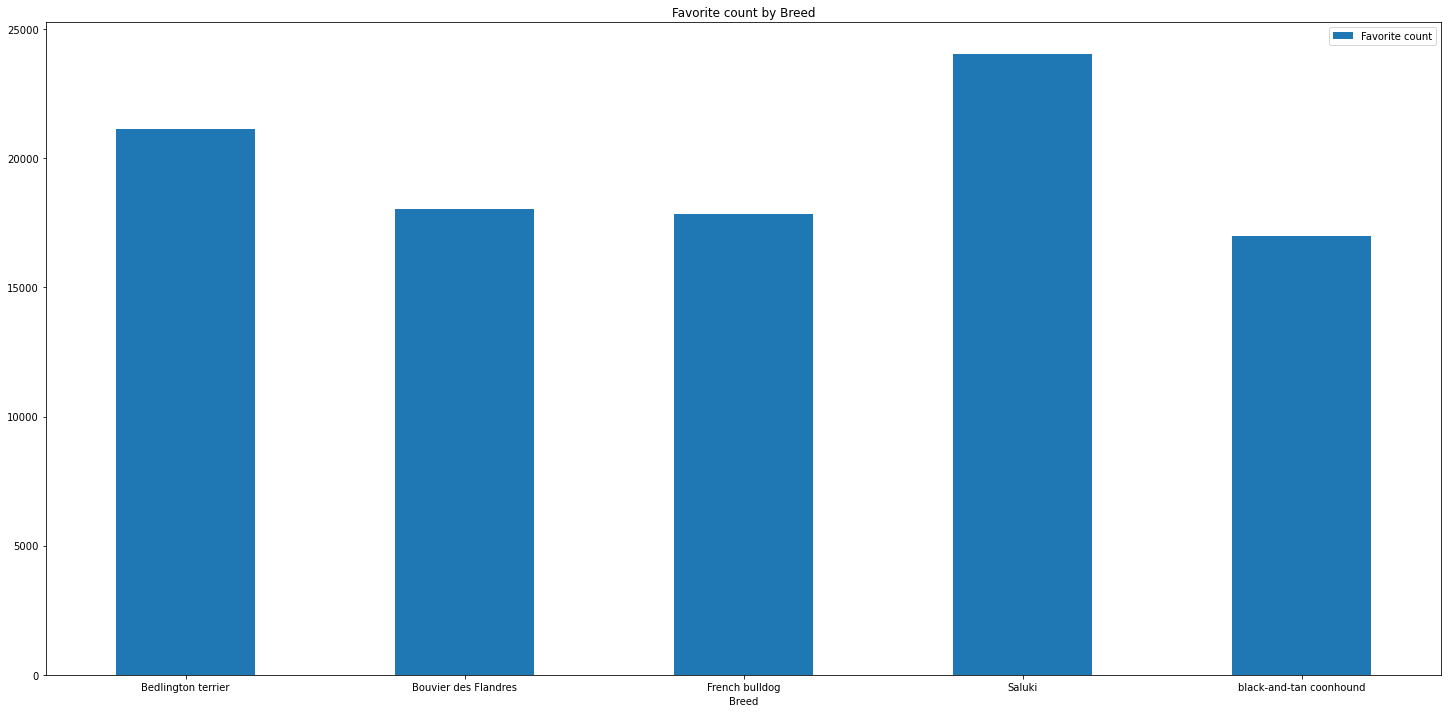

In [43]:
twitter_archive_master_topfavorite = twitter_archive_master_graph[twitter_archive_master_graph["Favorite count"] > 17000]
twitter_archive_master_topfavorite.plot.bar(x='Breed',y='Favorite count',title="Favorite count by Breed",figsize=(25,12), rot=0)

In [44]:
twitter_archive_master_dogstage = twitter_archive_master.groupby(['Dog Stage']).mean()
twitter_archive_master_dogstage=twitter_archive_master_dogstage.reset_index()  
twitter_archive_master_dogstage.head()

,Dog Stage,Tweet id,Rating numerator,Rating denominator,Retweet count,Favorite count
0,Doggo,7.966746e+17,9.849315,10.000000,6941.452055,19044.164384
1,Floofer,7.665514e+17,10.000000,10.000000,4968.714286,13206.000000
2,None,7.343875e+17,9.368705,10.564149,2593.125300,8527.494604
3,Pupper,7.187022e+17,9.601990,10.000000,2382.502488,7250.527363
4,Puppo,8.089964e+17,9.954545,10.000000,6473.954545,21582.090909
